In [1]:
from keychestenv import KeyChestEnvironmentRandom, KeyChestGymEnv, KeyChestEnvironment
from keychestenv_gui import jupyter_gui
from keychestenv_gofa import features_for_obs, max_reward, hardcoded_policy_step
from matplotlib import pyplot as plt
from helpers import get_env_performance
import numpy as np
from tqdm import tqdm
from time import time

In [11]:
def fixed_seed_constructor(seed=42, **kwargs):
    np.random.seed(seed)
    return KeyChestEnvironmentRandom(**kwargs)

env = KeyChestGymEnv(engine_constructor=fixed_seed_constructor,#KeyChestEnvironmentRandom,
                     width=10, height=10, initial_health=15, food_efficiency=15,
                     reward_dict=reward, flatten_observation=True)

Wrong action


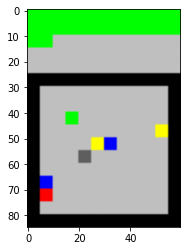

 (0, -1) 3 2.9 False {'action': 3, 'event': 'food_collected', 'moves': 3} 21.999999999999986


KeyboardInterrupt: Interrupted by user

In [13]:
jupyter_gui(env)

In [2]:
reward = {'step': -.1, 'food_collected': 3, 'key_collected': 4, 'chest_opened': 5}

env = KeyChestGymEnv(engine_constructor=KeyChestEnvironmentRandom,
                     width=10, height=10, initial_health=15, food_efficiency=15,
                     reward_dict=reward, flatten_observation=True)

/home/sergei/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
print("Steps per second:", get_env_performance(env, 3))

Steps per second: 6055.333333333333


In [4]:
env.reset().shape

(2040,)

In [5]:
obss = []
obss.append(env.reset())
while len(obss) < 1000:
    obs, rew, done, info = env.step(env.action_space.sample())
    obss.append(obs)
    if done:
        obss.append(env.reset())

In [6]:
obss

[array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0.,

limit_output extension: Maximum message size of 10000 exceeded with 53999 characters

In [7]:
env.observation_space.shape

(2040,)

In [8]:
env.action_space.shape

()

In [9]:
import gym
env1 = gym.make('CartPole-v0')
get_env_performance(env1, 3)

56011.666666666664

In [10]:
features_for_obs(env.reset())

IndexError: too many indices for array

In [ ]:
mr = max_reward(env)
mr

In [ ]:
def reward_on_policy(env, policy):
    done = False
    Rmax = max_reward(env)
    obs = env.reset()
    R = 0
    while not done:
        act = policy(env)
        obs, rew, done, info = env.step(act)
        #plt.imshow(env.render(mode='rgb_array'))
        #plt.show()
        R += rew
    #print(f"Reward {R} out of {Rmax}")
    return R

In [ ]:
rews = [reward_on_policy(env, hardcoded_policy_step) for _ in tqdm(range(500))]

In [ ]:
plt.title("Rewards by hardcoded policy")
plt.hist(rews, alpha=0.5, label='Reward')
plt.axvline(mr, color='red', label='Maximal reward')
plt.legend()
plt.show()

In [ ]:
jupyter_gui(env)